In [20]:
import os
os.chdir('C:\\Users\\User\\Documents\\stat2020\\ass3')
os.getcwd()

'C:\\Users\\User\\Documents\\stat2020\\ass3'

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

In [22]:
orig_df = pd.read_excel('Assignment3_cluster2.xlsx',sheet_name='2561')
orig_df.head()

,ministry,personnel,operation,invest,subsidy,others
0,a,9939.0,72812.9,82482.4,239565.7,10783.2
1,b,3941.3,2770.8,3682.2,9474.7,14005.7
2,c,91153.1,25039.5,9544.1,6610.7,88176.3
3,d,12235.8,6177.6,3177.1,89.2,216561.9
4,e,3045.3,2534.2,574.0,1182.7,1425.3


<AxesSubplot:>

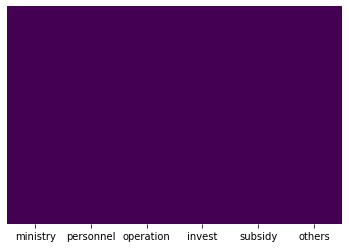

In [23]:
sns.heatmap(orig_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [24]:
orig_df.describe()

,personnel,operation,invest,subsidy,others
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,28462.750000,10513.700000,20182.654545,35893.331818,17666.586364
std,57347.538506,16476.568137,36846.180745,79843.393311,48335.520488
min,406.600000,337.800000,396.200000,24.500000,187.000000
25%,2138.875000,1268.200000,945.400000,731.400000,757.500000
50%,6358.500000,3156.850000,3429.650000,2863.200000,1761.600000
75%,16420.200000,14095.325000,21618.150000,8963.900000,8003.350000
max,250754.500000,72812.900000,156059.300000,264311.400000,216561.900000


In [25]:
orig_df.columns

Index(['ministry', 'personnel', 'operation', 'invest', 'subsidy', 'others'], dtype='object')

In [26]:
df = orig_df[['personnel','operation','invest', 'subsidy','others']]
df

,personnel,operation,invest,subsidy,others
0,9939.0,72812.9,82482.4,239565.7,10783.2
1,3941.3,2770.8,3682.2,9474.7,14005.7
2,91153.1,25039.5,9544.1,6610.7,88176.3
3,12235.8,6177.6,3177.1,89.2,216561.9
4,3045.3,2534.2,574.0,1182.7,1425.3
5,1342.8,1107.3,1911.2,340.1,1921.5
6,2652.9,3542.9,1383.2,5951.5,187.0
7,25019.6,15538.5,55276.8,3139.3,856.5
8,9492.6,2308.9,156059.3,268.4,638.8
9,1163.7,1163.4,1379.2,2587.1,277.8


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,0.038077,1.000000,0.527332,0.906368,0.048971
1,0.014119,0.033570,0.021110,0.035757,0.063865
2,0.362482,0.340830,0.058767,0.024921,0.406652
3,0.047251,0.080577,0.017865,0.000245,1.000000
4,0.010540,0.030306,0.001142,0.004382,0.005723


In [28]:
df_normalized.describe()

,0,1,2,3,4
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.112069,0.140405,0.127111,0.135719,0.080784
std,0.229071,0.227341,0.236705,0.302109,0.223388
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006919,0.012838,0.003528,0.002675,0.002637
50%,0.023775,0.038897,0.019487,0.010741,0.007277
75%,0.063965,0.189824,0.136333,0.033825,0.036124
max,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'SSE')

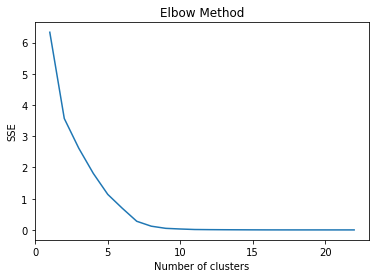

In [29]:
max_k = 23
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [30]:
k = 6

In [31]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=6)

In [32]:
cluster_predictions = kmeans.predict(df_normalized)
df['cluster_id'] = cluster_predictions
df

,personnel,operation,invest,subsidy,others,cluster_id
0,9939.0,72812.9,82482.4,239565.7,10783.2,3
1,3941.3,2770.8,3682.2,9474.7,14005.7,2
2,91153.1,25039.5,9544.1,6610.7,88176.3,0
3,12235.8,6177.6,3177.1,89.2,216561.9,4
4,3045.3,2534.2,574.0,1182.7,1425.3,2
5,1342.8,1107.3,1911.2,340.1,1921.5,2
6,2652.9,3542.9,1383.2,5951.5,187.0,2
7,25019.6,15538.5,55276.8,3139.3,856.5,0
8,9492.6,2308.9,156059.3,268.4,638.8,5
9,1163.7,1163.4,1379.2,2587.1,277.8,2


In [33]:
df.to_csv('res_2561.csv')

In [34]:
df.cluster_id.value_counts()

2    13
0     4
3     2
5     1
4     1
1     1
Name: cluster_id, dtype: int64

In [35]:
print(metrics.silhouette_score(df,kmeans.labels_))

0.584151772805008


In [36]:
print(metrics.davies_bouldin_score(df,kmeans.labels_))

0.41428998932998473


In [37]:
df[df.cluster_id==0].mean()

personnel     70949.025
operation     17807.050
invest        26805.575
subsidy        6040.000
others        23603.525
cluster_id        0.000
dtype: float64